<a href="https://colab.research.google.com/github/cornpip/xrchallenge/blob/main/xr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# 필요한거 import하고 박스붙혀주는 함수

import numpy as np
import cv2 as cv2
import math
from google.colab.patches import cv2_imshow
import random

def setLabel(img, pts, label):
  label = str(label)
  (x, y, w, h) = cv2.boundingRect(pts)
  pt1 = [x-w, y-h]
  pt2 = [x + 2*w, y + 2*h]
  if( x-w < 0 ):
    pt1[0] = x
    pt2[0] = x+w
  if( y-h < 0):
    pt1[1] = y
    pt2[1] = y+h
  
  color = 0
  if(label == "yellow"):
    color = (0,127,255)
    #if(x-2*w >= 0):
    #  pt1[0] = x-2*w
    #  pt2[0] = x + 3*w
  elif(label == "red"):
    color = (0,0,255)
  elif(label == "green"):
    color = (50,255,0)

  # 색깔따라 열 포인트 생각해보자
  print(pt1)
  pt1 = tuple(pt1)
  pt2 = tuple(pt2)
  print(pt1)
  test = img[pt1[1]:pt2[1], pt1[0]:pt2[0]]
  #cv2_imshow(test)
  #test1 = cv2.Canny(test,50,100)
  #contours, _ = cv2.findContours(test1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for cont in contours:
    approx = cv2.approxPolyDP(cont, cv2.arcLength(cont, True) * 0.05, True)
    vtc = len(approx)
    #if(vtc == 4):
    #  cv2.rectangle(img, pt1, pt2, (50, 255, 0), 2)

  cv2.rectangle(img, pt1, pt2, color, 2)
  #(255,0,255)
  cv2.putText(img, label, (pt1[0], pt1[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

In [ ]:
# 두번째 셀 영상에 적용

color = ['yellow', 'red', 'green'] # 박스에 나올 이름

cap = cv2.VideoCapture('/0806test2.mp4') # VideoCapture 객체 정의
fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 코덱 정의

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH) # 또는 cap.get(3)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 또는 cap.get(4)
fps = cap.get(cv2.CAP_PROP_FPS) # 또는 cap.get(5)

out = cv2.VideoWriter('0806test2_opencv2.mp4', fourcc, fps, (int(width), int(height)))

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...")
    break

  frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)#BGR --> HSV

  mask = []
  mask.append(cv2.inRange(frame_hsv[:int(height/2), :], (10, 120, 50), (30, 255, 255))) #빨~주~노 (이게 거의 빨강 안잡히고 주황잡히네)
  mask.append(cv2.inRange(frame_hsv[:int(height/2), :], (170, 120, 50), (180, 255, 255))) #빨
  mask.append(cv2.inRange(frame_hsv[:int(height/2), :], (40, 120, 50), (90, 255, 255))) #초록~하늘민트?
  # h, s, v가 색상, 채도, 명도고  (5, 120, 80), (32, 255, 255)는 색상5~32범위 채도120~255 명도80~255 범위 걸러주는거
  # cv2.inRange 반환값은 이진값 0아니면 1
  
  for i,j in enumerate(mask) : #이진 반환값 넣고
    contours, _ = cv2.findContours(j, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # 윤곽선 따고
    for cont in contours:
      approx = cv2.approxPolyDP(cont, cv2.arcLength(cont, True) * 0.05, True) # 윤곽선 조금 누그러뜨리는?? 윤곽선 폐곡선으로 적당히 따주는
      vtc = len(approx) # 이게 approx 길이가 꼭지점 수(== 이어지는 선의 수) 같아 지금은 안쓰는데 저 갯수로 사각형 이런것도 거를수 있음

      area = cv2.contourArea(cont) #cont 윤곽선 면적 (cont말고 approx값 넣을 수도 있음)
      _, radius = cv2.minEnclosingCircle(cont)#cont 윤곽선 반지름 
      ratio=0
      if(5 < area < 300): #노이즈 제거, 너무 작게 잡히는 애들 거르고
        ratio = radius * radius * math.pi / area # 파이 알 제곱/ 원 면적 해서 1나오면 원이다 라는 접근
        #print(ratio)
      if (0.9 < ratio < 3.6): # 범위 넓힐수록 더 많이 잡힘
        setLabel(frame[:int(height/2), :], cont, '{a}'.format(a=color[i], b=x))
  out.write(frame)

cap.release()
out.release()

프레임을 수신할 수 없습니다(스트림 끝?). 종료 중 ...


(371, 632, 3)


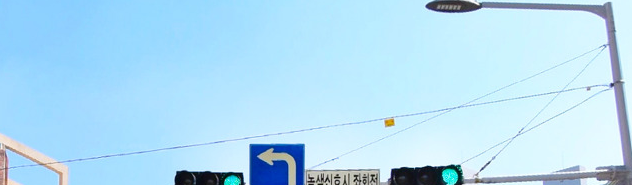

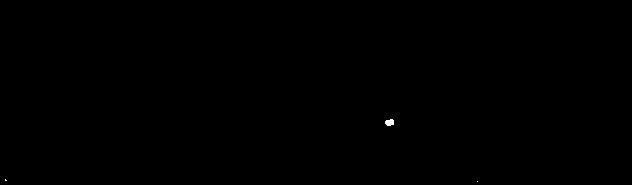

num= 0
389.1875
area= 33.5
ratio1= 1.7382869726217127
ratio2= 1.5324371995480888
hi
5
[376, 112]
(376, 112)


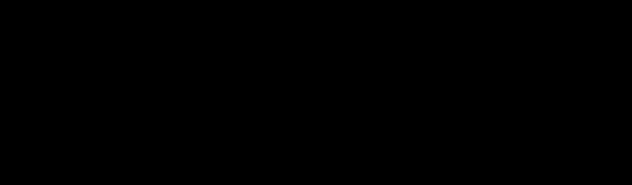

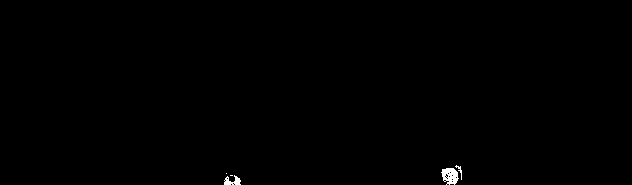

num= 2
232.0
area= 87.5
ratio1= 2.44152546780782
ratio2= 2.9065779378664525
hi
6
[207, 165]
(207, 165)
num= 2
448.3571472167969
area= 158.5
ratio1= 1.8326482745071568
ratio2= 1.4947773205502999
hi
6
[423, 151]
(423, 151)
num= 2
458.5
area= 18.0
ratio1= 9.64320405349578
ratio2= 17.3577672962924


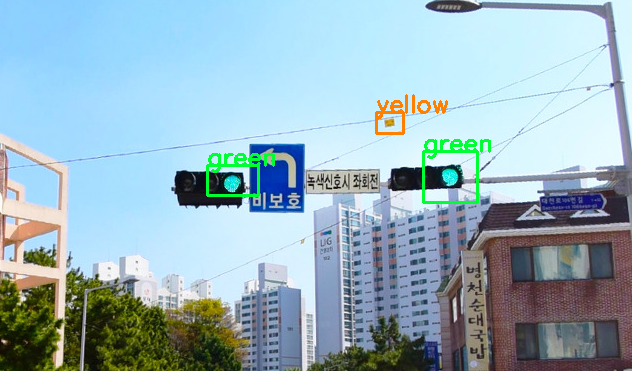

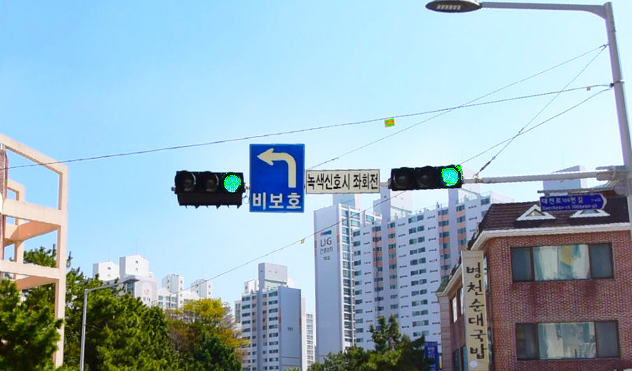

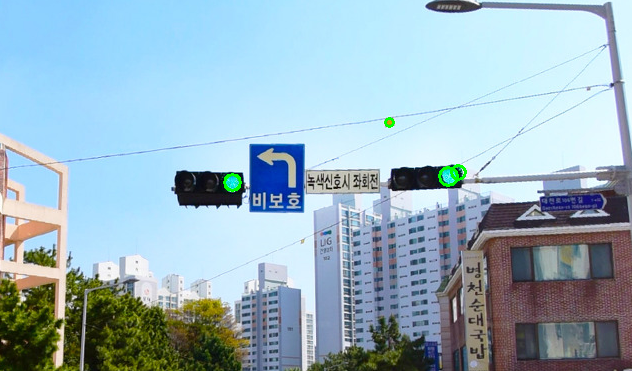

In [45]:
# 세번째 셀 사진

src = cv2.imread('/gra.PNG')
if src is None:
    print('Image load failed!')

src1 = src.copy() # 이미지 불러온거 카피
src2 = src.copy()
src3 = src.copy()
src4 = src.copy()

src1_hsv = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV) # hsv로 바꾸고 나머지 동일
height, width, channel = src1_hsv.shape
print(src1.shape)
cv2_imshow(src1[:int(height/2), :])



color = ['yellow', 'red', 'green']

mask = []
mask.append(cv2.inRange(src1_hsv[:int(height/2), :], (5, 120, 50), (30, 255, 255))) #빨~주~노 (이게 거의 빨강 안잡히고 주황잡히네)
mask.append(cv2.inRange(src1_hsv[:int(height/2), :], (170, 120, 50), (180, 255, 255))) #빨
mask.append(cv2.inRange(src1_hsv[:int(height/2), :], (40, 120, 50), (90, 255, 255))) #초록~하늘민트?

img, img2 = 0, 0
for i,j in enumerate(mask) :
  cv2_imshow(j) 
  contours, _ = cv2.findContours(j, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  x = 0
  for cont in contours:
    approx = cv2.approxPolyDP(cont, cv2.arcLength(cont, True) * 0.05, True)
    vtc = len(approx)
    #print(vtc)
    area = cv2.contourArea(approx)
    area2 =cv2.contourArea(cont)
    #print("area-=",area)
    #print("cont=",cv2.contourArea(cont))
    (x,y), radius = cv2.minEnclosingCircle(approx)
    (x1,y1), radius2 = cv2.minEnclosingCircle(cont)
    center = (int(x), int(y))
    center1 = (int(x1), int(y1))
    ratio=0
    ratio2=0
    if(5 < area < 500):
      ratio = radius * radius * math.pi / area ## 반지름은 비슷하게 나오는거같고 area좀더 정확하게 보려면 cont_area 쪽이 나을듯
      ratio2 = radius2 * radius2 * math.pi / area2 
      print("num=",i)
      print(x)
      print("area=",area)
      print("ratio1=",ratio)
      print("ratio2=",ratio2)
      #print("ratio2=",ratio2)
      cv2.circle(src3, center, int(radius), (255,0,0), 2)
      #setLabel(src1[:int(height/2), :], cont, '{a}_{b}'.format(a=color[i], b=x))
      x += 1
      cv2.circle(src4, center1, int(radius2), (0,255,0), 2)
      #(img, pt1, pt2, (50, 255, 0), 2)
    if (0.9 < ratio < 2.5 ): #ratio 3.9따리
      print('hi')
      print(vtc)
      #cv2.circle(src3, center, int(radius), (255,0,0), 2)
      setLabel(src1, cont, '{a}'.format(a=color[i], b=x))
      #_{b}
      #src1[:int(height/2), :]
      # setlabel함수에 img는 어차피 사각형 그릴이미지로만 쓰일뿐이니까
      # 굳이 잘린거 안넣어도됨 
      # 잘린거 넣으면 박스 반아래내려가면 짤려보임

    img = cv2.drawContours(src, [approx], -1, (0,255,0), 1)
    img2 = cv2.drawContours(src2, cont, -1, (0,255,0), 1)
cv2_imshow(src1)
#cv2_imshow(img)
#cv2_imshow(src3)
cv2_imshow(img2)
cv2_imshow(src4)
# 신호등 못잡아주는게 일단 area작은범위 원을 못잡음 + 윤곽선이 (멀리있어서)누그려뜨려 따지면 area가 작고 circle그리는건 제대로 그려져서
# ratio 값이 조금 크게나옴 3~5?

In [ ]:
src = cv2.imread("/33.PNG", cv2.IMREAD_COLOR)
height, width, channel = src[100:200, 400:600].shape

dst = cv2.pyrUp(src[100:200, 400:600], dstsize=(width * 2, height * 2), borderType=cv2.BORDER_DEFAULT)
dst2 = cv2.pyrDown(src[100:200, 400:600])

cv2_imshow( src[100:200, 400:600])
cv2_imshow( dst)
cv2_imshow( dst2)

src1 = dst
src1_hsv = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)

src1_hsv = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)

mask = []
mask.append(cv2.inRange(src1_hsv, (5, 120, 80), (32, 255, 255))) #빨~주~노 (이게 거의 빨강 안잡히고 주황잡히네)
mask.append(cv2.inRange(src1_hsv, (170, 120, 80), (180, 255, 255))) #빨
mask.append(cv2.inRange(src1_hsv, (60, 120, 80), (90, 255, 255))) #초록~하늘민트?

for i,j in enumerate(mask) :
  #cv2_imshow(j)
  contours, _ = cv2.findContours(j, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for cont in contours:
    approx = cv2.approxPolyDP(cont, cv2.arcLength(cont, True) * 0.05, True)
    vtc = len(approx)
    area = cv2.contourArea(cont)
    _, radius = cv2.minEnclosingCircle(cont)
    ratio=0
    if(area > 30):
      ratio = radius * radius * math.pi / area
      print(ratio)
      #int(ratio) == 1
    if (0.9 < ratio < 2.5):
        #print('gi')
      setLabel(src1, cont, color[i])
cv2_imshow(src1)

TypeError: ignored

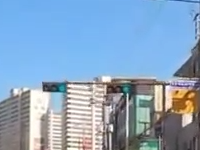

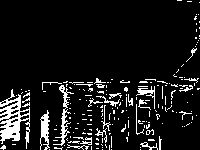

7.383757505574016
3.9052935776194273
8.176244525038143
17.032830947861136


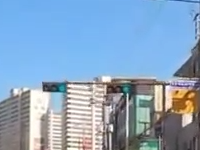

In [ ]:
src = cv2.imread('/gagahh.PNG')
if src is None:
    print('Image load failed!')

src1 = src.copy() # 이미지 불러온거 카피

src2 = src1[50:200, 400:600]
cv2_imshow(src2)

a = cv2.inRange(src2[:int(height/2), :], (120, 50, 30), (160, 255, 255))
cv2_imshow(a)
# 이게 반디캠 같은거에서 색깔을 누그러뜨리나?
# 120~160 영역에서 왜 저렇게 잡히는지 모르겠네

contours, _ = cv2.findContours(a, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cont in contours:
    approx = cv2.approxPolyDP(cont, cv2.arcLength(cont, True) * 0.05, True)
    vtc = len(approx)
    area = cv2.contourArea(cont)
    _, radius = cv2.minEnclosingCircle(cont)
    ratio=0
    if(area > 30):
      ratio = radius * radius * math.pi / area
      print(ratio)
      #int(ratio) == 1
    if (0.9 < ratio < 2.5):
      print('gi')
      setLabel(src2, cont, 'yap')
cv2_imshow(src2)
## opencv는 직접찍은거 정도에서는 잘잡힐듯

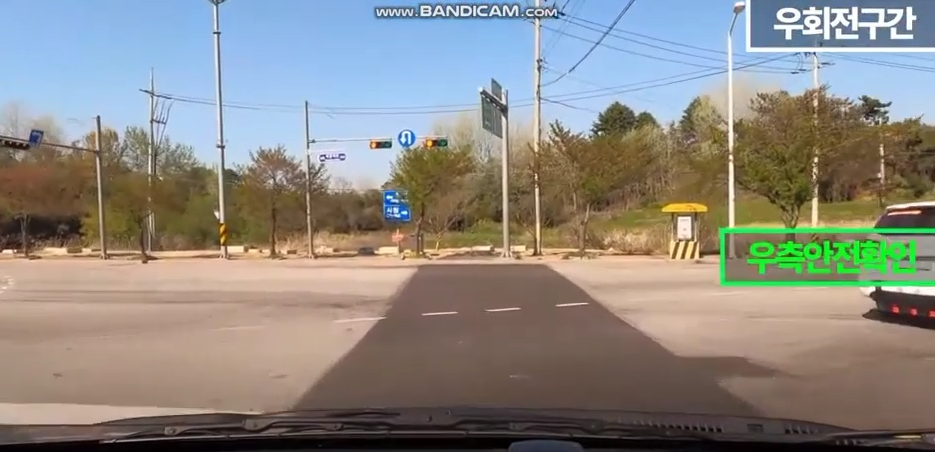

(452, 935, 3)


In [ ]:
src = cv2.imread('/0505.PNG')
if src is None:
    print('Image load failed!')

src1 = src.copy() # 이미지 불러온거 카피
src2 = src.copy()
src3 = src.copy()
src4 = src.copy()

cv2_imshow(src)
print(src.shape)
a = src1[130:150,350:450]
cv2_imshow(a)

a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

b = cv2.Canny(a, 50, 100)
cv2_imshow(b)



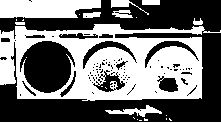

0


1


2


3


4


5


6


7


8


9


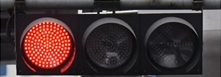

10


11


12


13


14


15


16


17


18


19


20


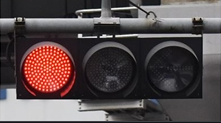

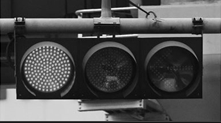

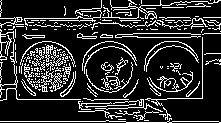

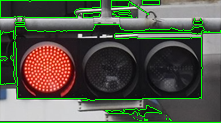

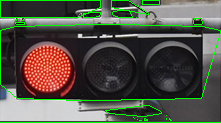

In [ ]:
# 신호등 캐니엣지 특성 찾아보자
src = cv2.imread('/canny2.PNG')
if src is None:
    print('Image load failed!')

src1 = src.copy() # 이미지 불러온거 카피
src2 = src.copy()
src3 = src.copy()
src4 = src.copy()


gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 50, 100)
#sobelx = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)

ret, binary = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bb=0
for cnt in contours:
  hull = cv2.convexHull(cnt, clockwise=True)
  cv2.drawContours(src1, [cnt], 0, (0, 255, 0), 1)
  cv2.drawContours(src2, [hull], 0, (0, 255, 0), 1)
    
  (x, y, w, h) = cv2.boundingRect(cnt)
  print(bb)
  cv2_imshow(src3[y:y+h,x:x+w])
  bb += 1
#print(hierarchy.shape)

# (next, prev, child, parent)
cv2_imshow(src)
cv2_imshow(gray)
cv2_imshow(canny)
#cv2_imshow(sobelx)
cv2_imshow(src1)
cv2_imshow(src2)

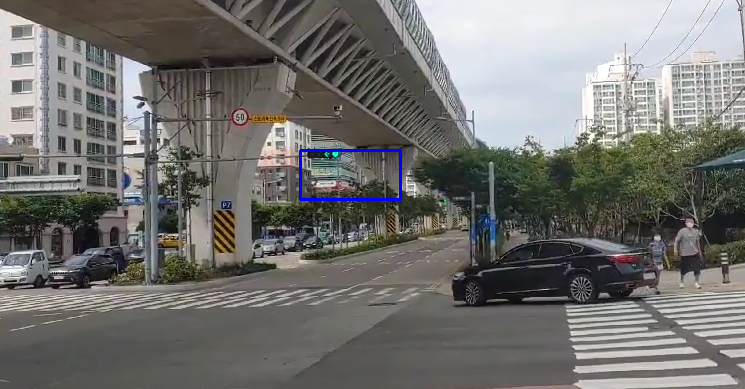

In [42]:
src = cv2.imread('/12444.PNG')
if src is None:
    print('Image load failed!')

src1 = src.copy() # 이미지 불러온거 카피
src2 = src.copy()
src3 = src.copy()
src4 = src.copy()

#print(src.shape)

a = [300,150]
b = [400,199]


a = tuple(a)
b = tuple(b)

cv2.rectangle(src1, a, b, (255,0,0), 2)

cv2_imshow(src1)